#### Salary Prediction Web App – Project Process

##### 1) Collected and preprocessed workplace-related data for salary prediction.
##### 2) Performed exploratory data analysis (EDA) to understand feature relationships.
##### 3) Selected relevant features influencing salary (e.g., Years at company, Satisfaction Level, Average monthly hours etc.).
##### 4) Built a regression model using Scikit-learn (e.g., Linear Regression or Random Forest).
##### 5) Evaluated model performance using metrics like Mean Squared Error (MSE).
##### 6) Saved the trained model using joblib or pickle for deployment.
##### 7) Created an interactive web app using Streamlit to collect user input.
##### 8) Integrated the model into the Streamlit app for real-time predictions.
##### 9) Deployed the app locally.


In [1]:
import pandas as pd
data = pd.read_csv("employee_attrition_data.csv")

In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [ ]:
data.duplicated().sum()

In [6]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

##### Dropping A Column

In [ ]:
data.drop(columns="Employee_ID",inplace=True)
data.head()

#### Grouping Columns
##### i) Grouping two columns

In [8]:
import matplotlib.pyplot as plt

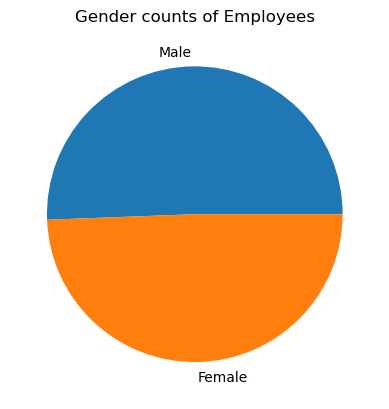

In [9]:
data["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.title("Gender counts of Employees")
plt.show()

In [ ]:
data.groupby("Job_Title")["Salary"].mean().sort_values(ascending = False)

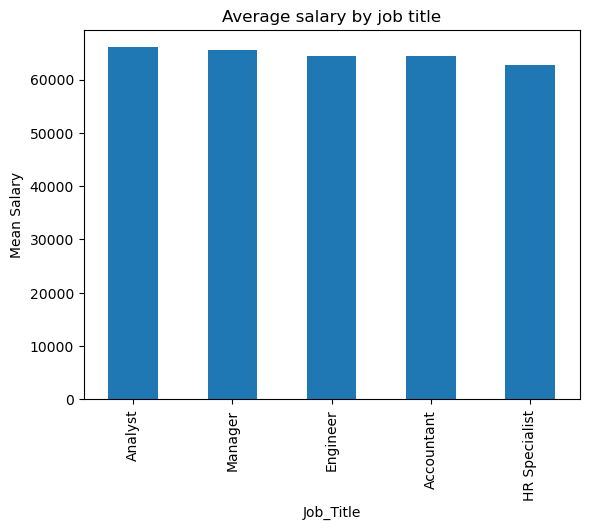

In [11]:
data.groupby("Job_Title")["Salary"].mean().sort_values(ascending = False).plot(kind ="bar")
plt.title("Average salary by job title")
plt.ylabel("Mean Salary")
plt.show()

##### ii) Grouping multiple columns

In [ ]:
data.head()

In [ ]:
data.groupby(["Department","Promotion_Last_5Years",])["Salary"].mean()

#### Index Resetting

In [14]:
data.groupby(["Department","Promotion_Last_5Years",])["Salary"].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [ ]:
data.describe()

In [ ]:
data["Salary"].describe()

In [ ]:
data.columns

In [ ]:
data.head()

In [19]:
X= data[["Years_at_Company","Satisfaction_Level", "Average_Monthly_Hours"]]
y=data[["Salary"]]

#### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

#### Scaling

In [ ]:
X

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

In [ ]:
X_train

In [24]:
# to prevent dataleakage we need to import joblib
import joblib
joblib.dump(scaler,"scaler.pkl")


['scaler.pkl']

In [25]:
X_test = scaler.fit_transform(X_test)

In [ ]:
X_test.shape

# Training ML models

#### 1) Linear Regression ML Model

In [ ]:
# But before Training we need to define the function that gives the regression results.
# To avoid writing mean Squarred erroe, mean absolute error

import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error

def results(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean squared error on model is {}".format(mean_squared_error(y_test,predictions)))

In [28]:
# Now Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [29]:
# predicting using linear regression
lr.predict(X_test)
predictionslr = lr.predict(X_test)
results(predictionslr)

Mean absolute error on model is 17402.218266621334
Root mean squared error on model is 405785425.5084888


#### 2) Support Vector Regression ML Model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svrmodel = SVR()    

In [31]:
param_gridsvr = {"C":[0.01,0.1,0.5],"degree":[2,3,4], "kernel":["linear","rbf","poly"]}   # defining the paramaters
gridsvr= GridSearchCV(svrmodel,param_gridsvr)                                             # initializing the grid search

In [32]:
gridsvr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [33]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'linear'}

In [34]:
predictionssvr = gridsvr.predict(X_test)
results(predictionssvr)

Mean absolute error on model is 17530.10723148151
Root mean squared error on model is 408578857.96252966


#### 3) Tree based Random Forest Regression  ML model

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridrfr = {"n_estimators":[2,3,4,5,6],"max_depth":[5,10,15]}

In [36]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)
gridrfr.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [37]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [38]:
predictionsrfr = gridrfr.predict(X_test)
results(predictionsrfr)

Mean absolute error on model is 17672.08968308387
Root mean squared error on model is 421707311.517621


#### Linear Regression has the lowest mean squarred error as compared to the other models

In [42]:
lr

LinearRegression()

In [43]:
joblib.dump(lr,"model.pkl")

['model.pkl']

In [41]:
X.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')